# Deep Learning: A Simple Example

- Let's get back to the Name Gender Classifier.

## Prepare Data

In [1]:
import numpy as np
import nltk
from nltk.corpus import names
import random

In [2]:
labeled_names = ([(name, 1) for name in names.words('male.txt')] +
                 [(name, 0) for name in names.words('female.txt')])
random.shuffle(labeled_names)

## Train-Test Split

In [3]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(labeled_names, test_size = 0.2, random_state=42)
print(len(train_set), len(test_set))

6355 1589


## Feature Engineering

- In deep learning, words or characters are automatically converted into numeric representations.
- In other words, the feature engineering step is fully automatic.

- Steps:
    - Text to Integers
    - Padding each instance to be of same lengths
    

In [4]:
import tensorflow as tf
import tensorflow.keras as keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical, plot_model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import SpatialDropout1D

In [5]:
names = [n for (n, l) in train_set]
labels = [l for (n, l) in train_set] 

In [6]:
len(names)

6355

### Tokenizer

In [7]:
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(names)

### Text to Sequences

In [8]:
names_ints = tokenizer.texts_to_sequences(names)

In [9]:
print(names[:10])
print(names_ints[:10])
print(labels[:10])

['Kimberlyn', 'Juan', 'Mariska', 'Rudd', 'Kitty', 'Janos', 'Aryn', 'Ana', 'Winny', 'Chevalier']
[[18, 3, 12, 15, 2, 5, 6, 11, 4], [19, 16, 1, 4], [12, 1, 5, 3, 9, 18, 1], [5, 16, 10, 10], [18, 3, 8, 8, 11], [19, 1, 4, 7, 9], [1, 5, 11, 4], [1, 4, 1], [23, 3, 4, 4, 11], [14, 13, 2, 20, 1, 6, 3, 2, 5]]
[0, 1, 0, 1, 0, 1, 0, 0, 0, 1]


### Vocabulary

In [10]:
# determine the vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)

Vocabulary Size: 30


In [11]:
tokenizer.word_index

{'a': 1,
 'e': 2,
 'i': 3,
 'n': 4,
 'r': 5,
 'l': 6,
 'o': 7,
 't': 8,
 's': 9,
 'd': 10,
 'y': 11,
 'm': 12,
 'h': 13,
 'c': 14,
 'b': 15,
 'u': 16,
 'g': 17,
 'k': 18,
 'j': 19,
 'v': 20,
 'f': 21,
 'p': 22,
 'w': 23,
 'z': 24,
 'x': 25,
 'q': 26,
 '-': 27,
 ' ': 28,
 "'": 29}

### Padding

Jean-Christophe


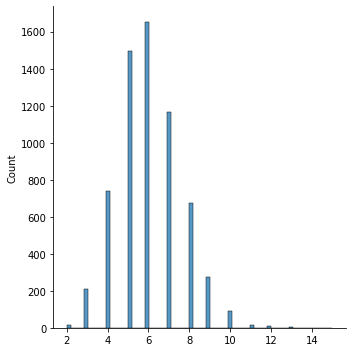

In [12]:
names_lens=[len(n) for n in names_ints]
names_lens
import seaborn as sns
sns.displot(names_lens)
print(names[np.argmax(names_lens)]) # longest name

In [13]:
max_len = names_lens[np.argmax(names_lens)]
max_len

15

In [14]:
names_ints_pad = sequence.pad_sequences(names_ints, maxlen = max_len)
names_ints_pad[:10]

array([[ 0,  0,  0,  0,  0,  0, 18,  3, 12, 15,  2,  5,  6, 11,  4],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 19, 16,  1,  4],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 12,  1,  5,  3,  9, 18,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  5, 16, 10, 10],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 18,  3,  8,  8, 11],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 19,  1,  4,  7,  9],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  5, 11,  4],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 23,  3,  4,  4, 11],
       [ 0,  0,  0,  0,  0,  0, 14, 13,  2, 20,  1,  6,  3,  2,  5]],
      dtype=int32)

## Define X and Y

In [15]:
X_train = np.array(names_ints_pad).astype('float32')
y_train = np.array(labels)

X_test = np.array(sequence.pad_sequences(
    tokenizer.texts_to_sequences([n for (n,l) in test_set]),
    maxlen = max_len)).astype('float32')
y_test = np.array([l for (n,l) in test_set])

X_test_texts = [n for (n,l) in test_set]

In [16]:
X_train.shape

(6355, 15)

In [17]:
X_train[2,]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  1.,  5.,  3.,  9.,
       18.,  1.], dtype=float32)

## Model Definition

In [85]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
## Plotting results
# def plot(history):

#     matplotlib.rcParams['figure.dpi'] = 100
#     acc = history.history['accuracy']
#     val_acc = history.history['val_accuracy']
#     loss = history.history['loss']
#     val_loss = history.history['val_loss']

#     epochs = range(1, len(acc)+1)
#     ## Accuracy plot
#     plt.plot(epochs, acc, 'bo', label='Training acc')
#     plt.plot(epochs, val_acc, 'b', label='Validation acc')
#     plt.title('Training and validation accuracy')
#     plt.legend()
#     ## Loss plot
#     plt.figure()

#     plt.plot(epochs, loss, 'bo', label='Training loss')
#     plt.plot(epochs, val_loss, 'b', label='Validation loss')
#     plt.title('Training and validation loss')
#     plt.legend()
#     plt.show()

    
def plot(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    #plt.gca().set_ylim(0,1)
    plt.show()

### Model 1

- Two layers of fully-connected dense layers

In [19]:
from keras import layers
model1 = keras.Sequential()
model1.add(keras.Input(shape=(max_len,)))
model1.add(layers.Dense(128, activation="relu", name="dense_layer_1"))
model1.add(layers.Dense(128, activation="relu", name="dense_layer_2"))
model1.add(layers.Dense(2, activation="softmax", name="output"))

model1.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"]
)


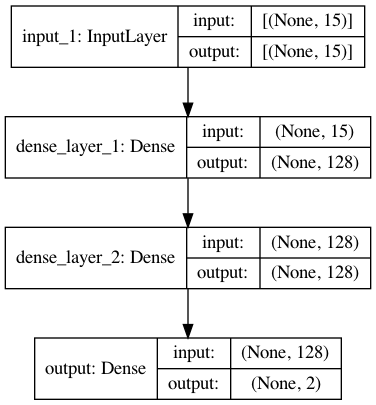

In [20]:
plot_model(model1, show_shapes=True )

In [21]:
history1 = model1.fit(X_train, y_train, 
                    batch_size=128, 
                    epochs=50, verbose=2,
                   validation_split = 0.2)

Epoch 1/50
40/40 - 3s - loss: 0.6426 - accuracy: 0.6764 - val_loss: 0.5912 - val_accuracy: 0.7183
Epoch 2/50
40/40 - 0s - loss: 0.5752 - accuracy: 0.7122 - val_loss: 0.5549 - val_accuracy: 0.7144
Epoch 3/50
40/40 - 0s - loss: 0.5504 - accuracy: 0.7254 - val_loss: 0.5492 - val_accuracy: 0.7231
Epoch 4/50
40/40 - 0s - loss: 0.5319 - accuracy: 0.7307 - val_loss: 0.5299 - val_accuracy: 0.7286
Epoch 5/50
40/40 - 0s - loss: 0.5258 - accuracy: 0.7349 - val_loss: 0.5234 - val_accuracy: 0.7270
Epoch 6/50
40/40 - 0s - loss: 0.5190 - accuracy: 0.7402 - val_loss: 0.5315 - val_accuracy: 0.7254
Epoch 7/50
40/40 - 0s - loss: 0.5092 - accuracy: 0.7469 - val_loss: 0.5171 - val_accuracy: 0.7309
Epoch 8/50
40/40 - 0s - loss: 0.4967 - accuracy: 0.7516 - val_loss: 0.5041 - val_accuracy: 0.7356
Epoch 9/50
40/40 - 0s - loss: 0.4848 - accuracy: 0.7598 - val_loss: 0.5238 - val_accuracy: 0.7356
Epoch 10/50
40/40 - 0s - loss: 0.4879 - accuracy: 0.7498 - val_loss: 0.5286 - val_accuracy: 0.7215
Epoch 11/50
40/40 -

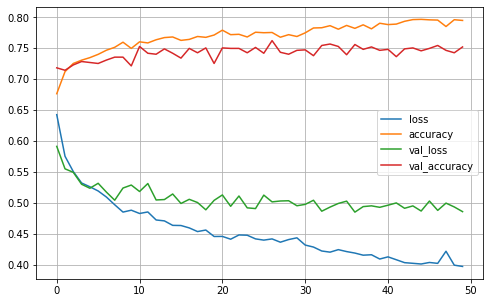

In [86]:
plot(history1)

In [23]:
model1.evaluate(X_test, y_test, batch_size=128, verbose=2)

13/13 - 0s - loss: 0.5277 - accuracy: 0.7558


[0.5276997089385986, 0.7558212876319885]

### Model 2

- One Embedding Layer + Two layers of fully-connected dense layers

In [24]:
EMBEDDING_DIM = 128
model2 = Sequential()
model2.add(Embedding(input_dim=vocab_size, output_dim=EMBEDDING_DIM, input_length=max_len, mask_zero=True))
model2.add(layers.GlobalAveragePooling1D()) ## The GlobalAveragePooling1D layer returns a fixed-length output vector for each example by averaging over the sequence dimension. This allows the model to handle input of variable length, in the simplest way possible.
model2.add(layers.Dense(128, activation="relu", name="dense_layer_1"))
model2.add(layers.Dense(128, activation="relu", name="dense_layer_2"))
model2.add(layers.Dense(2, activation="softmax", name="output"))

model2.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"]
)

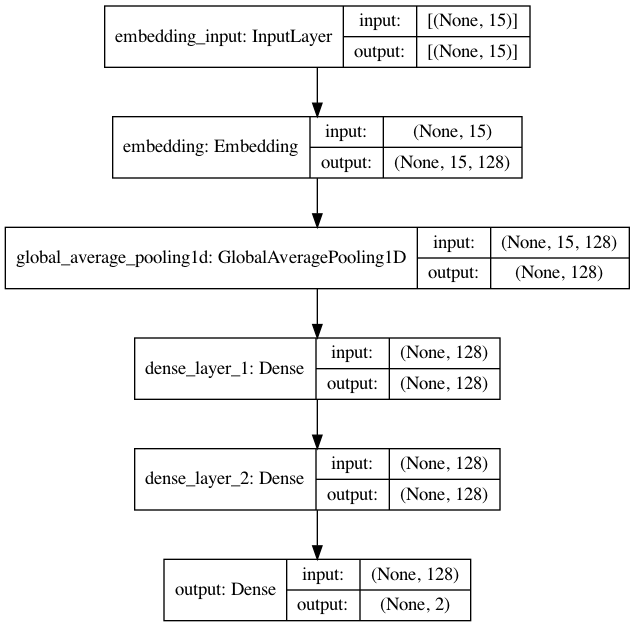

In [25]:
plot_model(model2, show_shapes=True)

In [26]:
history2 = model2.fit(X_train, y_train, 
                    batch_size=128, 
                    epochs=50, verbose=2,
                    validation_split = 0.2)

Epoch 1/50
40/40 - 1s - loss: 0.6327 - accuracy: 0.6434 - val_loss: 0.5773 - val_accuracy: 0.7113
Epoch 2/50
40/40 - 0s - loss: 0.5739 - accuracy: 0.7036 - val_loss: 0.5572 - val_accuracy: 0.7144
Epoch 3/50
40/40 - 0s - loss: 0.5587 - accuracy: 0.7177 - val_loss: 0.5562 - val_accuracy: 0.7215
Epoch 4/50
40/40 - 0s - loss: 0.5527 - accuracy: 0.7268 - val_loss: 0.5538 - val_accuracy: 0.7270
Epoch 5/50
40/40 - 0s - loss: 0.5463 - accuracy: 0.7321 - val_loss: 0.5729 - val_accuracy: 0.7081
Epoch 6/50
40/40 - 0s - loss: 0.5482 - accuracy: 0.7276 - val_loss: 0.5584 - val_accuracy: 0.7183
Epoch 7/50
40/40 - 0s - loss: 0.5380 - accuracy: 0.7333 - val_loss: 0.5472 - val_accuracy: 0.7317
Epoch 8/50
40/40 - 0s - loss: 0.5326 - accuracy: 0.7384 - val_loss: 0.5491 - val_accuracy: 0.7341
Epoch 9/50
40/40 - 0s - loss: 0.5272 - accuracy: 0.7408 - val_loss: 0.5485 - val_accuracy: 0.7262
Epoch 10/50
40/40 - 0s - loss: 0.5221 - accuracy: 0.7463 - val_loss: 0.5577 - val_accuracy: 0.7223
Epoch 11/50
40/40 -

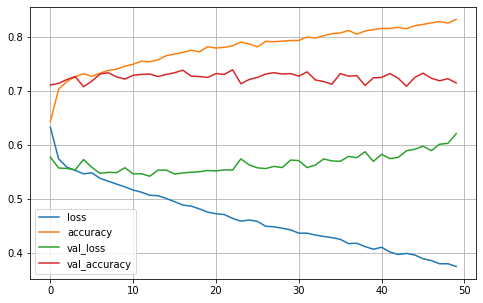

In [87]:
plot(history2)

In [28]:
model2.evaluate(X_test, y_test, batch_size=128, verbose=2)

13/13 - 0s - loss: 0.5622 - accuracy: 0.7495


[0.5622150301933289, 0.7495279908180237]

## Check Embeddings

- Compared to one-hot encodings of characters, embeddings may include more information relating to the characteristics of the characters.
- We can extract the embedding layer and apply dimensional reduction techniques (i.e., TSNE) to see how embeddings capture the relationships in-between characters.

In [114]:
ind2char = tokenizer.index_word
[ind2char.get(i) for i in X_test[10]]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 'j',
 'e',
 'r',
 'r',
 'o',
 'l',
 'd']

In [134]:
char_vectors = model2.layers[0].get_weights()[0]
char_vectors.shape

(30, 128)

In [135]:
labels = [char for (ind, char) in tokenizer.index_word.items()]
labels.insert(0,None)
labels

[None,
 'a',
 'e',
 'i',
 'n',
 'r',
 'l',
 'o',
 't',
 's',
 'd',
 'y',
 'm',
 'h',
 'c',
 'b',
 'u',
 'g',
 'k',
 'j',
 'v',
 'f',
 'p',
 'w',
 'z',
 'x',
 'q',
 '-',
 ' ',
 "'"]

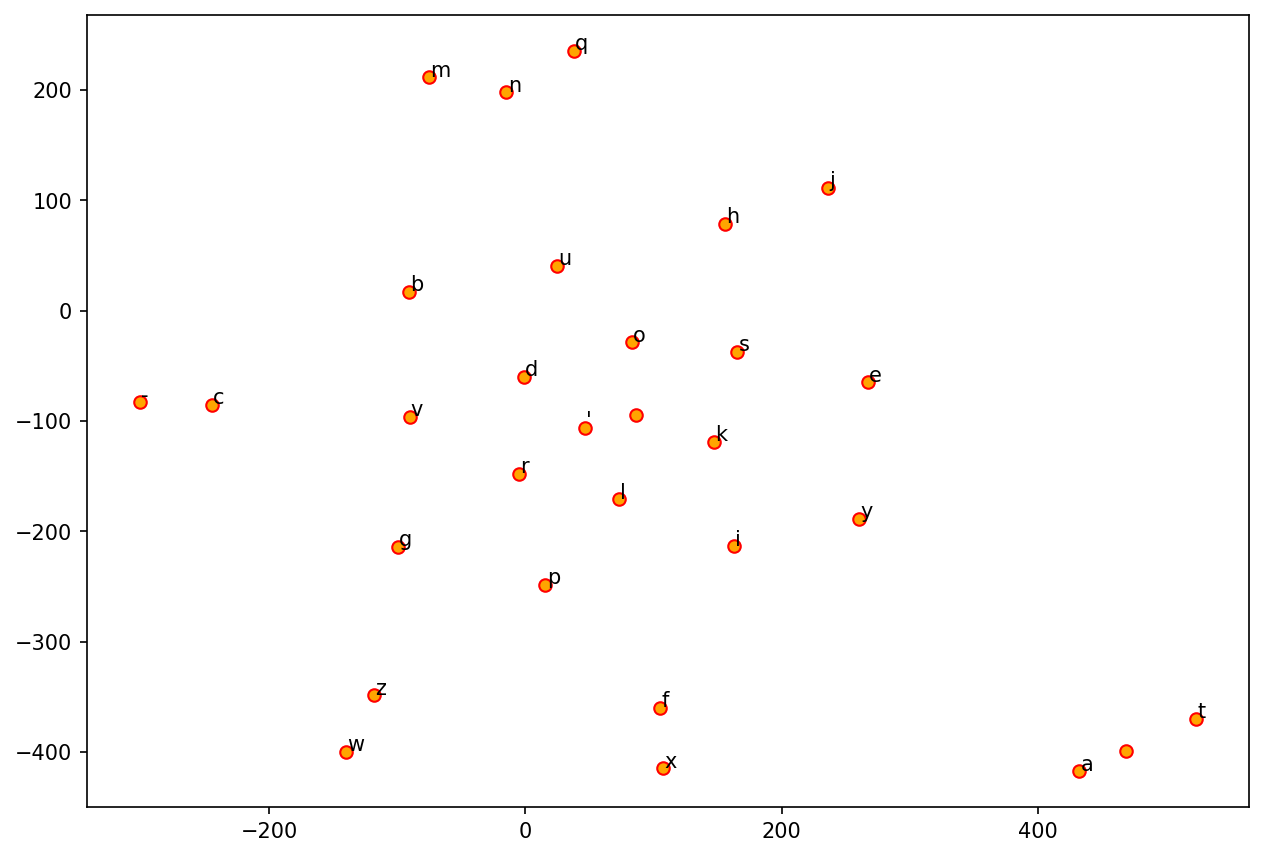

In [138]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0, n_iter=5000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(char_vectors)
labels = labels

plt.figure(figsize=(10, 7), dpi=150)
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

## Issues of Word/Character Representations

- One-hot encoding does not indicate semantic relationships between characters.
- For deep learning NLP, it is preferred to convert one-hot encodings of words/characters into embeddings, which are argued to include more semantic information of the tokens.
- Now the question is how to train and create better word embeddings. We will come back to this issue later.

## Hyperparameter Tuning

- Like feature-based ML methods, neural networks also come with many hyperparameters, which require default values.
- Typical hyperparameters include:
    - Number of nodes for the layer
    - Learning Rates
- We can utilize the module, [`kerastuner`](https://keras-team.github.io/keras-tuner/documentation/tuners/), to fine-tune the hyperparameters.

- Steps for Keras Tuner
    - First, wrap the model definition in a function, which takes a single `hp` argument. 
    - Inside this function, replace any value we want to tune with a call to hyperparameter sampling methods, e.g. `hp.Int()` or `hp.Choice()`. The function should return a compiled model.
    - Next, instantiate a tuner object specifying your optimization objective and other search parameters.
    - Finally, start the search with the `search()` method, which takes the same arguments as `Model.fit()` in keras.
    - When search is over, we can retrieve the best model and a summary of the results from the `tunner`.


In [29]:
import kerastuner

In [142]:
## Wrap model definition in a function
## and specify the parameters needed for tuning
def build_model(hp):
    model1 = keras.Sequential()
    model1.add(keras.Input(shape=(max_len,)))
    model1.add(layers.Dense(hp.Int('units', min_value=32, max_value=128, step=32), activation="relu", name="dense_layer_1"))
    model1.add(layers.Dense(hp.Int('units', min_value=32, max_value=128, step=32), activation="relu", name="dense_layer_2"))
    model1.add(layers.Dense(2, activation="softmax", name="output"))
    model1.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate',
                      values=[1e-2, 1e-3, 1e-4])),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])
    return model1

# def build_model(hp):
#     inputs = keras.Input(shape=(784,))
#     x = layers.Dense(
#         units=hp.Int('units', min_value=32, max_value=512, step=32),
#         activation='relu'))(inputs)
#     outputs = layers.Dense(10, activation='softmax')(x)
#     model = keras.Model(inputs, outputs)
#     model.compile(
#         optimizer=keras.optimizers.Adam(
#             hp.Choice('learning_rate',
#                       values=[1e-2, 1e-3, 1e-4])),
#         loss='sparse_categorical_crossentropy',
#         metrics=['accuracy'])
#     return model

In [144]:
## This is to clean up the temp dir from the tuner
## Every time we re-start the tunner, it's better to keep the temp dir clean

import os
import shutil

if os.path.isdir('my_dir'):
    shutil.rmtree('my_dir')
    

In [145]:
## Instantiate the tunner

tuner = kerastuner.tuners.RandomSearch(
  build_model,
  objective='val_accuracy',
  max_trials=10,
  executions_per_trial=3,
  directory='my_dir')

In [146]:
## Check the tuner's search space
tuner.search_space_summary()

Search space summary
Default search space size: 2
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [147]:
## Start tuning with the tuner
tuner.search(X_train, y_train, validation_split=0.2, batch_size=128)

Trial 9 Complete [00h 00m 03s]
val_accuracy: 0.7191188136736552

Best val_accuracy So Far: 0.7191188136736552
Total elapsed time: 00h 00m 31s
INFO:tensorflow:Oracle triggered exit


In [35]:
## Retrieve the best models from the tuner
models = tuner.get_best_models(num_models=2)

In [36]:
## Retrieve the summary of results from the tuner
tuner.results_summary()

Results summary
Results in my_dir/untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
units: 128
learning_rate: 0.001
Score: 0.7133490641911825
Trial summary
Hyperparameters:
units: 96
learning_rate: 0.01
Score: 0.7125623027483622
Trial summary
Hyperparameters:
units: 96
learning_rate: 0.001
Score: 0.7004982829093933
Trial summary
Hyperparameters:
units: 64
learning_rate: 0.001
Score: 0.6949908137321472
Trial summary
Hyperparameters:
units: 128
learning_rate: 0.0001
Score: 0.6197220087051392
Trial summary
Hyperparameters:
units: 64
learning_rate: 0.0001
Score: 0.5727773408095042


## Sequence Models

### Model 3

- One Embedding Layer + LSTM + Dense Layer

In [37]:
EMBEDDING_DIM = 128
model3 = Sequential()
model3.add(Embedding(input_dim=vocab_size, output_dim=EMBEDDING_DIM, input_length=max_len, mask_zero=True))
#model3.add(SpatialDropout1D(0.2))
model3.add(LSTM(64))# , dropout=0.2, recurrent_dropout=0.2))
model3.add(Dense(2, activation="softmax"))

model3.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"]
)

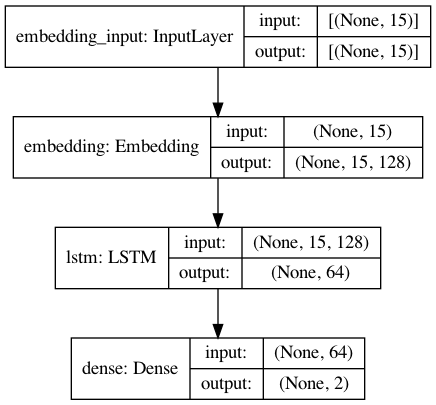

In [38]:
plot_model(model3, show_shapes=True)

In [39]:
history3 = model3.fit(X_train, y_train, 
                    batch_size=128, 
                    epochs=50, verbose=2,
                   validation_split = 0.2)

Epoch 1/50
40/40 - 6s - loss: 0.6243 - accuracy: 0.6412 - val_loss: 0.5494 - val_accuracy: 0.7293
Epoch 2/50
40/40 - 1s - loss: 0.5036 - accuracy: 0.7606 - val_loss: 0.4463 - val_accuracy: 0.7836
Epoch 3/50
40/40 - 1s - loss: 0.4457 - accuracy: 0.7801 - val_loss: 0.4239 - val_accuracy: 0.8041
Epoch 4/50
40/40 - 1s - loss: 0.4347 - accuracy: 0.7907 - val_loss: 0.4203 - val_accuracy: 0.7946
Epoch 5/50
40/40 - 1s - loss: 0.4294 - accuracy: 0.7939 - val_loss: 0.4139 - val_accuracy: 0.8080
Epoch 6/50
40/40 - 1s - loss: 0.4259 - accuracy: 0.7966 - val_loss: 0.4108 - val_accuracy: 0.8127
Epoch 7/50
40/40 - 1s - loss: 0.4222 - accuracy: 0.8004 - val_loss: 0.4045 - val_accuracy: 0.8135
Epoch 8/50
40/40 - 1s - loss: 0.4190 - accuracy: 0.8025 - val_loss: 0.4051 - val_accuracy: 0.8175
Epoch 9/50
40/40 - 1s - loss: 0.4149 - accuracy: 0.8004 - val_loss: 0.4004 - val_accuracy: 0.8214
Epoch 10/50
40/40 - 1s - loss: 0.4115 - accuracy: 0.8017 - val_loss: 0.3998 - val_accuracy: 0.8143
Epoch 11/50
40/40 -

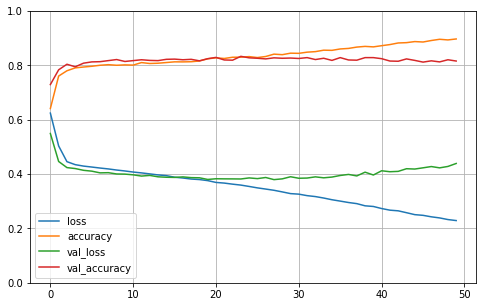

In [40]:
plot(history3)

### Model 4

- One Embedding Layer + Two Stacked LSTM + Dense Layer

In [41]:
EMBEDDING_DIM = 128
model4 = Sequential()
model4.add(Embedding(input_dim=vocab_size, output_dim=EMBEDDING_DIM, input_length=max_len, mask_zero=True))
#model.add(SpatialDropout1D(0.2))
model4.add(LSTM(64, return_sequences=True)) #, dropout=0.2, recurrent_dropout=0.2))
model4.add(LSTM(64))
model4.add(Dense(2, activation="softmax"))

model4.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"]
)

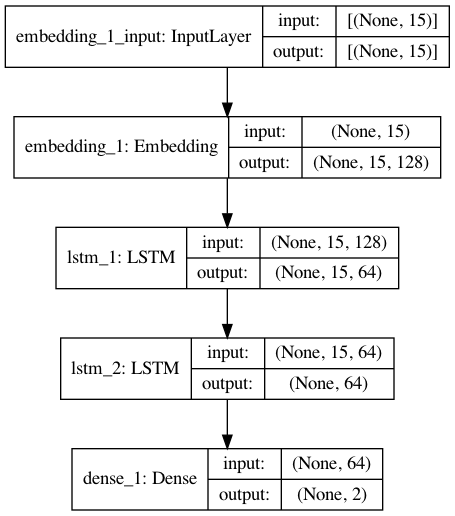

In [42]:
plot_model(model4,show_shapes=True)

In [43]:
history4 = model4.fit(X_train, y_train, 
                    batch_size=128, 
                    epochs=50, verbose=2,
                   validation_split = 0.2)

Epoch 1/50
40/40 - 10s - loss: 0.6456 - accuracy: 0.6275 - val_loss: 0.6029 - val_accuracy: 0.6672
Epoch 2/50
40/40 - 1s - loss: 0.5884 - accuracy: 0.6841 - val_loss: 0.5460 - val_accuracy: 0.7364
Epoch 3/50
40/40 - 1s - loss: 0.4911 - accuracy: 0.7620 - val_loss: 0.4315 - val_accuracy: 0.7939
Epoch 4/50
40/40 - 1s - loss: 0.4400 - accuracy: 0.7864 - val_loss: 0.4203 - val_accuracy: 0.7939
Epoch 5/50
40/40 - 1s - loss: 0.4337 - accuracy: 0.7899 - val_loss: 0.4144 - val_accuracy: 0.7994
Epoch 6/50
40/40 - 1s - loss: 0.4296 - accuracy: 0.7952 - val_loss: 0.4101 - val_accuracy: 0.8072
Epoch 7/50
40/40 - 1s - loss: 0.4233 - accuracy: 0.7972 - val_loss: 0.4046 - val_accuracy: 0.8088
Epoch 8/50
40/40 - 1s - loss: 0.4195 - accuracy: 0.7962 - val_loss: 0.4021 - val_accuracy: 0.8175
Epoch 9/50
40/40 - 1s - loss: 0.4145 - accuracy: 0.7970 - val_loss: 0.3953 - val_accuracy: 0.8222
Epoch 10/50
40/40 - 1s - loss: 0.4095 - accuracy: 0.8055 - val_loss: 0.3970 - val_accuracy: 0.8175
Epoch 11/50
40/40 

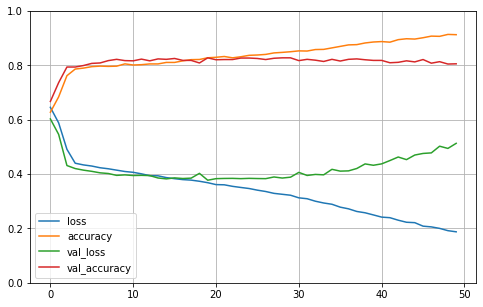

In [44]:
plot(history4)

### Model 5

- One Embedding Layer + LSTM [hidden state of last time step + cell state of last time step] + Dense Layer

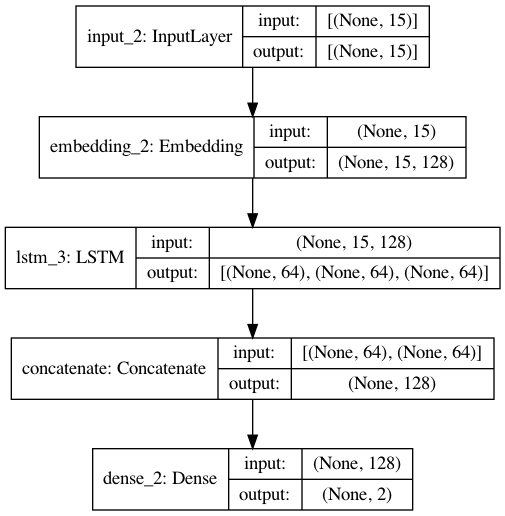

In [45]:
EMBEDDING_DIM = 128

inputs = keras.Input(shape=(max_len,))
x=layers.Embedding(input_dim=vocab_size, output_dim=EMBEDDING_DIM, input_length=max_len, mask_zero=True)(inputs)
#x=layers.SpatialDropout1D(0.2)(x)
x_all_h,x_last_h, x_c = layers.LSTM(64, dropout=0.2, 
                               recurrent_dropout=0.2, 
                               return_sequences=False, return_state=True)(x)
## LSTM Parameters:
#     `return_seqeunces=True`: return the hidden states for each time step
#     `return_state=True`: return the cell state of the last time step
#     When both are set True, the return values of LSTM are:
#     (1) the hidden states of all time steps (when `return_sequences=True`) or the hidden state of the last time step
#     (2) the hidden state of the last time step
#     (3) the cell state of the last time step

x = layers.Concatenate(axis=1)([x_last_h, x_c])
outputs=layers.Dense(2, activation='softmax')(x)
model5 = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

plot_model(model5, show_shapes=True)

In [46]:
model5.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"]
)
history5 = model5.fit(X_train, y_train, 
                    batch_size=128, 
                    epochs=50, verbose=2,
                   validation_split = 0.2)

Epoch 1/50
40/40 - 4s - loss: 0.6023 - accuracy: 0.6621 - val_loss: 0.5197 - val_accuracy: 0.7537
Epoch 2/50
40/40 - 1s - loss: 0.4781 - accuracy: 0.7606 - val_loss: 0.4376 - val_accuracy: 0.7891
Epoch 3/50
40/40 - 1s - loss: 0.4450 - accuracy: 0.7840 - val_loss: 0.4225 - val_accuracy: 0.8096
Epoch 4/50
40/40 - 1s - loss: 0.4348 - accuracy: 0.7925 - val_loss: 0.4229 - val_accuracy: 0.8096
Epoch 5/50
40/40 - 1s - loss: 0.4324 - accuracy: 0.7960 - val_loss: 0.4190 - val_accuracy: 0.8104
Epoch 6/50
40/40 - 1s - loss: 0.4290 - accuracy: 0.7941 - val_loss: 0.4148 - val_accuracy: 0.8104
Epoch 7/50
40/40 - 1s - loss: 0.4275 - accuracy: 0.7996 - val_loss: 0.4135 - val_accuracy: 0.8198
Epoch 8/50
40/40 - 1s - loss: 0.4258 - accuracy: 0.7980 - val_loss: 0.4117 - val_accuracy: 0.8135
Epoch 9/50
40/40 - 1s - loss: 0.4204 - accuracy: 0.8029 - val_loss: 0.4058 - val_accuracy: 0.8198
Epoch 10/50
40/40 - 1s - loss: 0.4201 - accuracy: 0.7996 - val_loss: 0.4035 - val_accuracy: 0.8096
Epoch 11/50
40/40 -

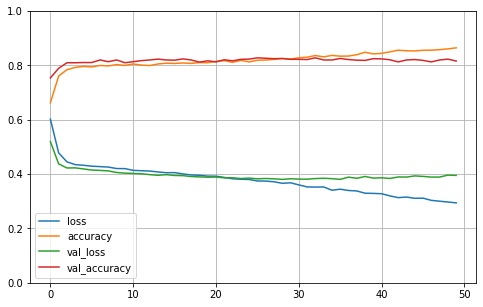

In [47]:
plot(history5)

In [48]:
model5.evaluate(X_test, y_test, batch_size=128, verbose=2)

13/13 - 0s - loss: 0.3842 - accuracy: 0.8232


[0.3841722905635834, 0.8231592178344727]

### Model 6

- Adding AttentionLayer
    - Use the hidden state h of the last time step and the cell state c of the last time step
    - Check their attention
    - And use [attention out + hidden state h of the last time step] for decision

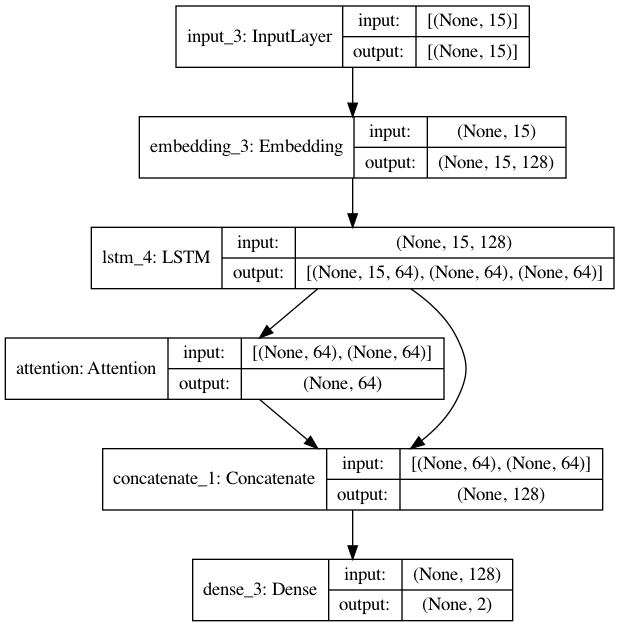

In [49]:
EMBEDDING_DIM = 128

inputs = keras.Input(shape=(max_len,))
x=layers.Embedding(input_dim=vocab_size, output_dim=EMBEDDING_DIM, input_length=max_len)(inputs)
#x=layers.SpatialDropout1D(0.2)(x)
x_all_hs, x_last_h, x_last_c = layers.LSTM(64, dropout=0.2, 
                               recurrent_dropout=0.2, 
                               return_sequences=True, return_state=True)(x)
## LSTM Parameters:
#     `return_seqeunces=True`: return the hidden states for each time step
#     `return_state=True`: return the cell state of the last time step
#     When both are set True, the return values of LSTM are:
#     (1) the hidden state of the last time step
#     (2) the hidden states of all time steps (when `return_sequences=True`) or the hidden state of the last time step
#     (3) the cell state of the last time step


atten_out = layers.Attention()([x_last_h, x_last_c])

x = layers.Concatenate(axis=1)([x_last_h, atten_out])
outputs=layers.Dense(2, activation='softmax')(x)
model6 = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

plot_model(model6, show_shapes=True)

In [50]:
model6.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"]
)
history6 = model6.fit(X_train, y_train, 
                    batch_size=128, 
                    epochs=50, verbose=2,
                   validation_split = 0.2)

Epoch 1/50
40/40 - 4s - loss: 0.6362 - accuracy: 0.6290 - val_loss: 0.5719 - val_accuracy: 0.6994
Epoch 2/50
40/40 - 1s - loss: 0.5220 - accuracy: 0.7400 - val_loss: 0.4661 - val_accuracy: 0.7710
Epoch 3/50
40/40 - 1s - loss: 0.4529 - accuracy: 0.7791 - val_loss: 0.4409 - val_accuracy: 0.7852
Epoch 4/50
40/40 - 1s - loss: 0.4442 - accuracy: 0.7891 - val_loss: 0.4220 - val_accuracy: 0.8072
Epoch 5/50
40/40 - 1s - loss: 0.4356 - accuracy: 0.7911 - val_loss: 0.4156 - val_accuracy: 0.8065
Epoch 6/50
40/40 - 1s - loss: 0.4285 - accuracy: 0.7921 - val_loss: 0.4137 - val_accuracy: 0.8135
Epoch 7/50
40/40 - 2s - loss: 0.4239 - accuracy: 0.7992 - val_loss: 0.4093 - val_accuracy: 0.8065
Epoch 8/50
40/40 - 1s - loss: 0.4203 - accuracy: 0.8007 - val_loss: 0.4077 - val_accuracy: 0.8049
Epoch 9/50
40/40 - 1s - loss: 0.4159 - accuracy: 0.8037 - val_loss: 0.4048 - val_accuracy: 0.8104
Epoch 10/50
40/40 - 1s - loss: 0.4128 - accuracy: 0.7968 - val_loss: 0.3992 - val_accuracy: 0.8190
Epoch 11/50
40/40 -

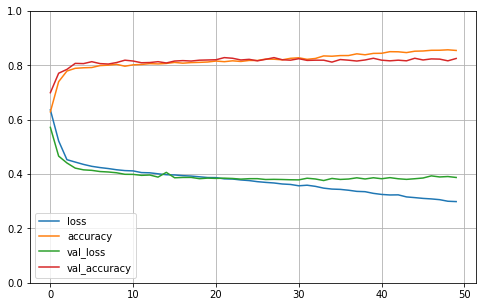

In [51]:
plot(history6)

## Explanation

In [52]:
from lime.lime_text import LimeTextExplainer

explainer = LimeTextExplainer(class_names=['female','male'], char_level=True)

In [53]:
def model_predict_pipeline(text):
    _seq = tokenizer.texts_to_sequences(text)
    _seq_pad = keras.preprocessing.sequence.pad_sequences(_seq, maxlen=max_len)
    #return np.array([[float(1-x), float(x)] for x in model.predict(np.array(_seq_pad))])
    return model6.predict(np.array(_seq_pad))



# np.array(sequence.pad_sequences(
#     tokenizer.texts_to_sequences([n for (n,l) in test_set]),
#     maxlen = max_len)).astype('float32')

In [54]:
reversed_word_index = dict([(index, word) for (word, index) in tokenizer.word_index.items()])

In [55]:
text_id =305

In [56]:
X_test[text_id]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 24.,  7.,  5.,
        1., 13.], dtype=float32)

In [57]:
X_test_texts[text_id]

'Zorah'

In [58]:
' '.join([reversed_word_index.get(i, '?') for i in X_test[text_id]])

'? ? ? ? ? ? ? ? ? ? z o r a h'

In [59]:
print(X_test[22])
print(X_test_texts[22])

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  4. 10.  5.  2. 11.]
Andrey


In [60]:
X_test_texts[text_id]

'Zorah'

In [61]:
model_predict_pipeline([X_test_texts[text_id]])

array([[0.7218352, 0.2781648]], dtype=float32)

In [62]:
exp = explainer.explain_instance(
X_test_texts[text_id], model_predict_pipeline, num_features=100, top_labels=1)

In [63]:
exp.show_in_notebook(text=True)

In [64]:
y_test[text_id]

0

In [65]:
exp = explainer.explain_instance(
'Alvin', model_predict_pipeline, num_features=100, top_labels=1)
exp.show_in_notebook(text=True)

In [66]:
exp = explainer.explain_instance(
'Michaelis', model_predict_pipeline, num_features=100, top_labels=1)
exp.show_in_notebook(text=True)

In [67]:
exp = explainer.explain_instance(
'Sidney', model_predict_pipeline, num_features=100, top_labels=1)
exp.show_in_notebook(text=True)

In [68]:
exp = explainer.explain_instance(
'Timber', model_predict_pipeline, num_features=100, top_labels=1)
exp.show_in_notebook(text=True)